# Анализ бизнес-показателей  Pro+

## Описание данных 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Выгрузка данных:

In [2]:
visits = pd.read_csv('visits_info.csv')
orders = pd.read_csv('orders_info.csv')
costs = pd.read_csv('costs_info.csv')
events = None 

### Таблица с информацией о посещениях сайта

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет, нужно поменять тип данных в столбцах Session Start и Session End.

In [5]:
print('Дубликатов: ', visits.duplicated().sum())

Дубликатов:  0


Переименую столбцы

In [6]:
visits.set_axis(['user_id', 'region','device', 'channel', 'session_start', 'session_end'],axis = 'columns', inplace = True)

In [7]:
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

### Таблица информации о заказах

In [9]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков нет. Event Dt поменять тип данных.

In [11]:
print('Дубликатов: ', orders.duplicated().sum())

Дубликатов:  0


In [12]:
orders.set_axis(['user_id', 'event_dt','revenue'],axis = 'columns', inplace = True)

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

### Таблица информации о затратах на маркетинг

In [14]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков нет. Столбец dt поменять тип данных.

In [16]:
print('Дубликатов: ', costs.duplicated().sum())

Дубликатов:  0


In [17]:
costs.set_axis(['dt', 'channel','costs'],axis = 'columns', inplace = True)

In [18]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

В таблицах orders_log_short и costs_short нет информации о единицах изменения, в которых расчитываются затраты. Из формулировки задания "огромные вложения в рекламу", возъем за единицу изменения тысячи рублей. 

## Исследовательский анализ данных

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Функции для расчетов

Нужно создать пользовательские профили с датой первого посещения и источником перехода на сайт.

In [19]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, events, costs, event_names=[]):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

Функция для расчёта LTV и ROI

In [21]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    order,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [22]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [23]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [24]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(14, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для расчёта конверсии

In [25]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

### Пользовательские профили

In [26]:
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Зададим максимальную и минимальную даты привлечения пользователей. Моментом анализа возьмем максимальную дату привлечения пользователей. Зададим недельный горизонт.

In [27]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print('Минимальная дата привлечения пользователей: ', min_date)
print('Максимальная дата привлечения пользователей: ', max_date)
min_date = datetime(2019, 5, 1).date()
max_date = datetime(2019, 10, 27).date()

horizon_days = 7
observation_date = max_date

Минимальная дата привлечения пользователей:  2019-05-01
Максимальная дата привлечения пользователей:  2019-10-27


Даты совпадают с заявленными в задании. 

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [28]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
retention_grouped

cohort_size    0         1         2         3         4  \
payer region                                                                    
False France               16193  1.0  0.176496  0.088989  0.052492  0.034274   
      Germany              13823  1.0  0.173479  0.084207  0.052811  0.034652   
      UK                   16238  1.0  0.176192  0.088435  0.051299  0.033502   
      United States        89612  1.0  0.177331  0.085837  0.051087  0.034772   
True  France                 634  1.0  0.481073  0.400631  0.329653  0.309148   
      Germany                590  1.0  0.498305  0.435593  0.335593  0.316949   
      UK                     672  1.0  0.501488  0.440476  0.343750  0.321429   
      United States         6646  1.0  0.379326  0.285886  0.238188  0.202076   

                            5         6  
payer region                             
False France         0.022294  0.019144  
      Germany        0.025175  0.018230  
      UK             0.025681  0.018044  
      United States  0.024684  0.018535  
True  France         0.301262  0.253943  
      Germany        0.291525  0.259322  
      UK             0.285714  0.287202  
      United States  0.184321  0.164309

Всего 4 страны, Франция, Германия, Англия и США. Видно, что максимальное число пользователей пришло из США, как не платящих, так и платящих. Меньше всего пользователей обеих категорий из Германии.

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [29]:
region_new = (
    profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'sum'})
)
region_new['ratio'] = (
    (region_new['payer'] / region_new['user_id'])*100
).map(lambda x: "{0:.4f}".format(x))
region_new 

,user_id,payer,ratio
region,,,
France,17450,663,3.7994
Germany,14981,616,4.1119
UK,17575,700,3.9829
United States,100002,6902,6.9019


По долям можно сделать вывод, что в лидерах по привлечению платных пользователей United States почти 7%, на втором месте Germany - 4%.

Посмотрим какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [30]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
retention_grouped

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        31727  1.0  0.176474  0.086645  0.052258  0.033379   
      Mac            27093  1.0  0.176134  0.084597  0.049644  0.033034   
      PC             27859  1.0  0.174988  0.086902  0.051043  0.035034   
      iPhone         49187  1.0  0.178136  0.086832  0.052168  0.035863   
True  Android         1974  1.0  0.407801  0.322695  0.271023  0.226444   
      Mac             1852  1.0  0.389849  0.302916  0.227862  0.208963   
      PC              1467  1.0  0.437628  0.357873  0.286980  0.281527   
      iPhone          3249  1.0  0.396430  0.302862  0.259464  0.213912   

                      5         6  
payer device                       
False Android  0.024207  0.017714  
      Mac      0.024730  0.019304  
      PC       0.024624  0.017517  
      iPhone   0.024681  0.019172  
True  Android  0.224417  0.180851  
      Mac      0.192765  0.171706  
      PC       0.229721  0.231084  
      iPhone   0.197907  0.180055

Лидером обеих категорий является iPhone	. Думаю это связано с тем, что лидером по количеству привлеченных клиентов является США.

Построим таблицу, отражающую количество пользователей и долю платящих для каждой модели устройства.

In [31]:
device_new = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'sum'})
)
device_new['ratio'] = (
    (device_new['payer'] / device_new['user_id'])*100
).map(lambda x: "{0:.4f}".format(x))
device_new 

,user_id,payer,ratio
device,,,
Android,35032,2050,5.8518
Mac,30042,1912,6.3644
PC,30455,1537,5.0468
iPhone,54479,3382,6.2079


В лидерах устройств платящих пользователей Mac. Количество платящих пользователей iPhone и Android почти равны.

In [32]:
retention_raw, retention_grouped, retention_in_time = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)
retention_grouped

cohort_size    0         1         2         3  \
payer channel                                                              
False AdNonSense                 3321  1.0  0.177657  0.087323  0.050587   
      FaceBoom                  24518  1.0  0.172730  0.087242  0.051065   
      LeapBob                    7945  1.0  0.170422  0.091126  0.051731   
      MediaTornado               4071  1.0  0.182510  0.082044  0.056006   
      OppleCreativeMedia         8034  1.0  0.171646  0.089121  0.053149   
      RocketSuperAds             3967  1.0  0.175195  0.086211  0.051424   
      TipTop                    16963  1.0  0.181690  0.084478  0.050758   
      WahooNetBanner             7766  1.0  0.183492  0.085501  0.053052   
      YRabbit                    3985  1.0  0.180176  0.084065  0.049435   
      lambdaMediaAds             1854  1.0  0.182309  0.086839  0.063107   
      organic                   53442  1.0  0.176809  0.085981  0.050784   
True  AdNonSense                  418  1.0  0.284689  0.160287  0.131579   
      FaceBoom                   3414  1.0  0.223784  0.123609  0.074985   
      LeapBob                     247  1.0  0.558704  0.489879  0.400810   
      MediaTornado                151  1.0  0.490066  0.456954  0.344371   
      OppleCreativeMedia          223  1.0  0.542601  0.461883  0.399103   
      RocketSuperAds              343  1.0  0.571429  0.469388  0.396501   
      TipTop                     1810  1.0  0.533702  0.464641  0.409392   
      WahooNetBanner              435  1.0  0.549425  0.517241  0.393103   
      YRabbit                     158  1.0  0.556962  0.386076  0.398734   
      lambdaMediaAds              222  1.0  0.563063  0.486486  0.391892   
      organic                    1121  1.0  0.559322  0.471900  0.421053   

                                 4         5         6  
payer channel                                           
False AdNonSense          0.037037  0.021680  0.018970  
      FaceBoom            0.032833  0.025573  0.019863  
      LeapBob             0.032096  0.023033  0.018754  
      MediaTornado        0.028986  0.024564  0.019406  
      OppleCreativeMedia  0.032238  0.026263  0.019169  
      RocketSuperAds      0.035291  0.020418  0.015377  
      TipTop              0.035312  0.026116  0.018865  
      WahooNetBanner      0.034381  0.022663  0.018027  
      YRabbit             0.036136  0.023588  0.016060  
      lambdaMediaAds      0.032902  0.031284  0.016181  
      organic             0.035983  0.024194  0.018132  
True  AdNonSense          0.076555  0.059809  0.057416  
      FaceBoom            0.058582  0.041301  0.038371  
      LeapBob             0.331984  0.392713  0.283401  
      MediaTornado        0.350993  0.344371  0.251656  
      OppleCreativeMedia  0.394619  0.309417  0.340807  
      RocketSuperAds      0.396501  0.329446  0.326531  
      TipTop              0.350829  0.343646  0.287293  
      WahooNetBanner      0.455172  0.379310  0.335632  
      YRabbit             0.367089  0.278481  0.259494  
      lambdaMediaAds      0.373874  0.369369  0.342342  
      organic             0.336307  0.330062  0.325602

По платящим пользователем лидерами стали FaceBoom и TipTop. Худшие показатели у каналов lambdaMediaAds и MediaTornado.

In [33]:
channel_new = (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'sum'})
)
channel_new['ratio'] = (
    (channel_new['payer'] / channel_new['user_id'])*100
).map(lambda x: "{0:.4f}".format(x))
channel_new 

,user_id,payer,ratio
channel,,,
AdNonSense,3880,440,11.3402
FaceBoom,29144,3557,12.2049
LeapBob,8553,262,3.0633
MediaTornado,4364,156,3.5747
OppleCreativeMedia,8605,233,2.7077
RocketSuperAds,4448,352,7.9137
TipTop,19561,1878,9.6007
WahooNetBanner,8553,453,5.2964
YRabbit,4312,165,3.8265


В лидерах по доле платящих пользователей FaceBoom и AdNonSense 12% и 11% соответсвенно. 

Можно сделать вывод, что основными пользователями развлекательного приложения являются жители United States с iPhone и Maс, переходящие по бесплатной ссылке, из FaceBoom и AdNonSense. 

## Маркетинг

Выясните:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Посмотрим на окупаемость рекламы.

In [34]:
costs_grouped = costs.groupby('channel').agg({'costs': 'sum'})

In [35]:
orders_grouped = orders.groupby('event_dt').agg({'revenue': 'sum'})

data = {'summary': [round(orders_grouped.sum().values[0], 2),round(costs_grouped.sum().values[0], 2)]}
rev_costs = pd.DataFrame(data=data, index=['revenue', 'costs'])
print('Всего потрачено на маркетинг {:.0f} руб'.format(costs['costs'].sum()))

Всего потрачено на маркетинг 105497 руб


Посмотрим затраты по источникам.

In [36]:
costs_grouped

,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Самыми затратными были каналы TipTop и FaceBoom. Помним, что FaceBoom в лидерах по привлечению платных пользователей. Нужно посчитать расходы по месяцам для анализа расходов. 


Всего потрачено на каждый из источников


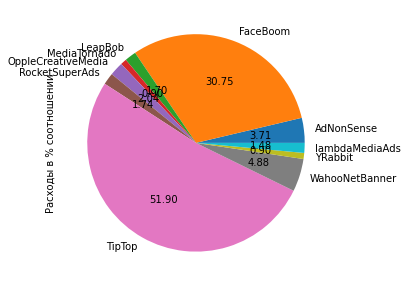

In [37]:
print('\nВсего потрачено на каждый из источников')
costs_grouped.plot(y = 'costs', autopct='%.2f', kind = 'pie', figsize = (15, 5), legend = False)
plt.ylabel('Расходы в % соотношении')
plt.show()

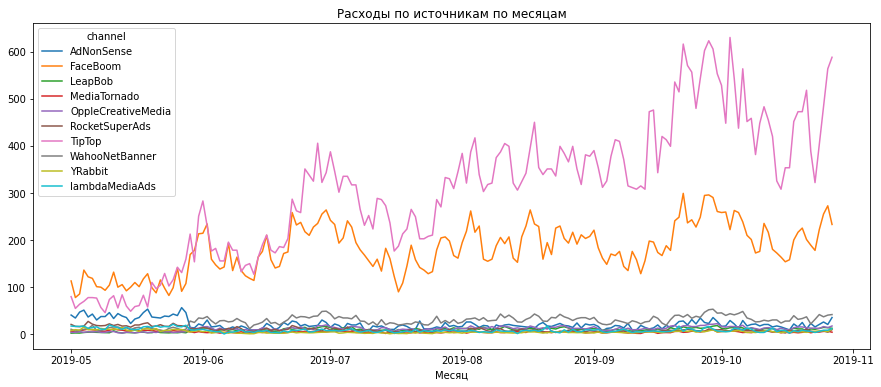

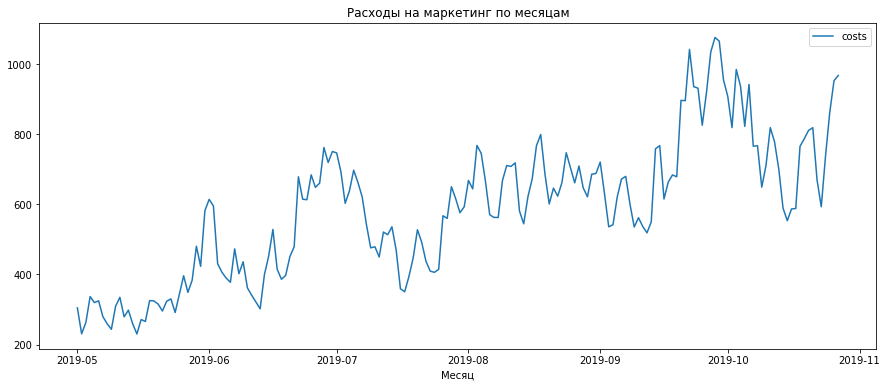

In [38]:
costs_pivot = costs.pivot_table(index = 'dt', columns = 'channel', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (15,6), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

costs.pivot_table(index = 'dt', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (15,6))
plt.xlabel('Месяц')
plt.show()

Видно, что затараты увеличиваются по двум источникам: TipTop и FaceBoom, что подтверждает предыдущую таблицу. Остальные источники +- одинаковые по затаратам. 

Посчитаю сколько в среднем стоило привлечение одного пользователя из каждого источника.

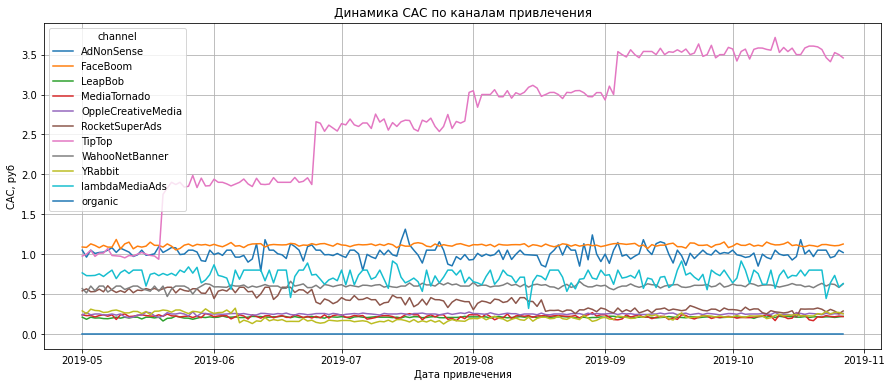

In [39]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(15, 6))
plt.ylabel('CAC, руб')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Стоимость привлечения «органических» пользователей во всех когортах равна нулю, потому что они перешли на сайт  самостоятельно, а не благодаря рекламе. Резко возрастает стоимость пользователя по каналу TipTop. 

По графикам можно сделать такие выводы: Вливания денег идут на два канала, TipTop и FaceBoom,однако TipTop эти затраты не оплавдывает т.к. стоимость привлечения одного пользователя резко возрастает. 

Считаем средний CAC по каналам привлечения

In [40]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
).round(3)

cac

,cac
channel,
AdNonSense,1.008
FaceBoom,1.113
LeapBob,0.210
MediaTornado,0.219
OppleCreativeMedia,0.250
RocketSuperAds,0.412
TipTop,2.799
WahooNetBanner,0.602
YRabbit,0.219


Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. Ожидаемо высокий САС у TipTop. В лидерах так же FaceBoom и AdNonSense. 

Cредний CAC на одного пользователя для всего проекта:

In [41]:
profiles = profiles.query('channel != "organic"')
cac = (profiles['acquisition_cost'].mean()).round(3)
cac

1.127

## Окупаемость рекламы для привлечения пользователей

При решении этого шага считаем, что смотрим данные 1-го ноября 2019 года и что в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

### Общая окупаемость рекламы

Находим LTV. 

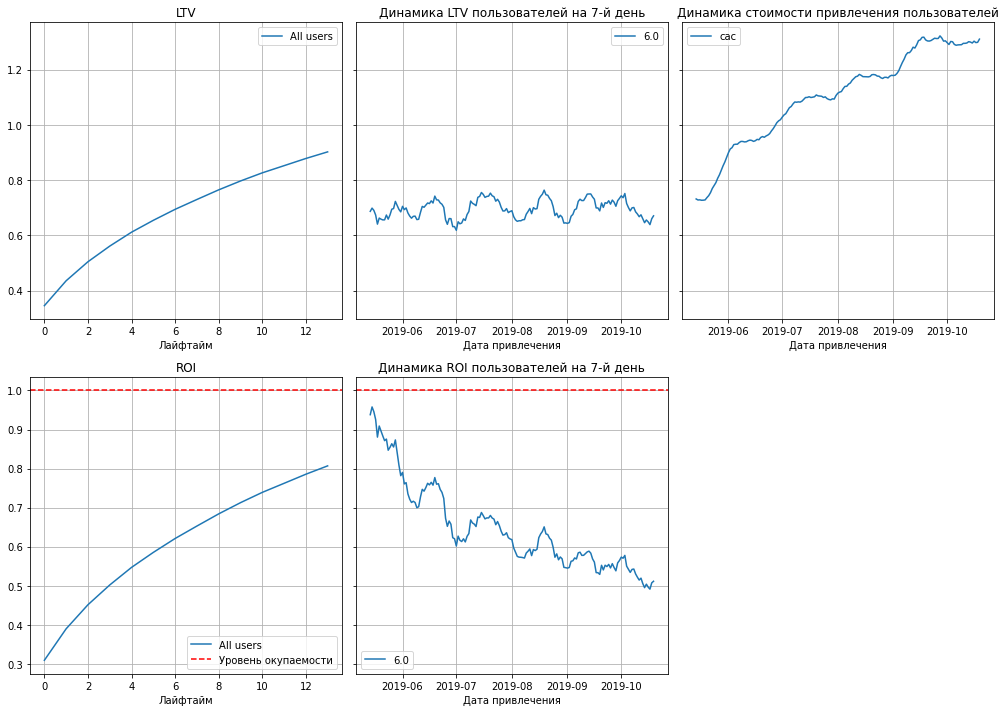

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается. 
* ROI в конце недели падает вниз. 
* CAC не стабилен из-за увеличения рекламного бюджета.
* Радует LTV, качество пользователей не падает.

### Окупаемость рекламы с разбивкой по источникам привлечения

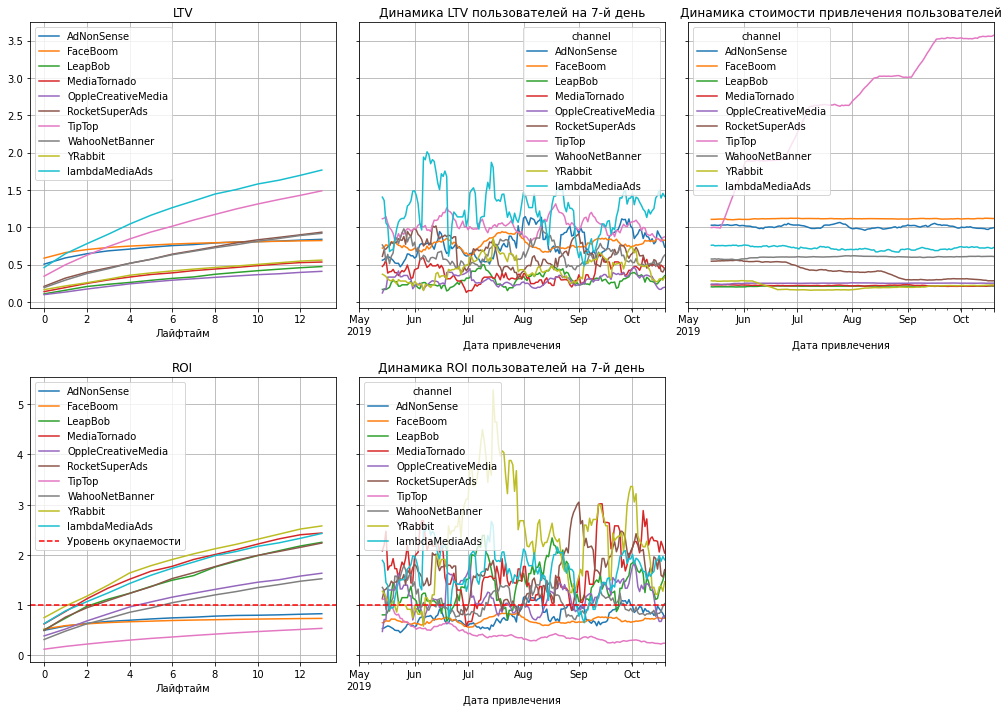

In [43]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders,datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Видно, что источники с высокис САС (TipTop,FaceBoom и AdNonSense) не окупаются. Хотя,в динамике AdNonSense иногда окупался. TipTop не только не окупается, но и теряет ROI.

### Oкупаемость рекламы с разбивкой по устройствам

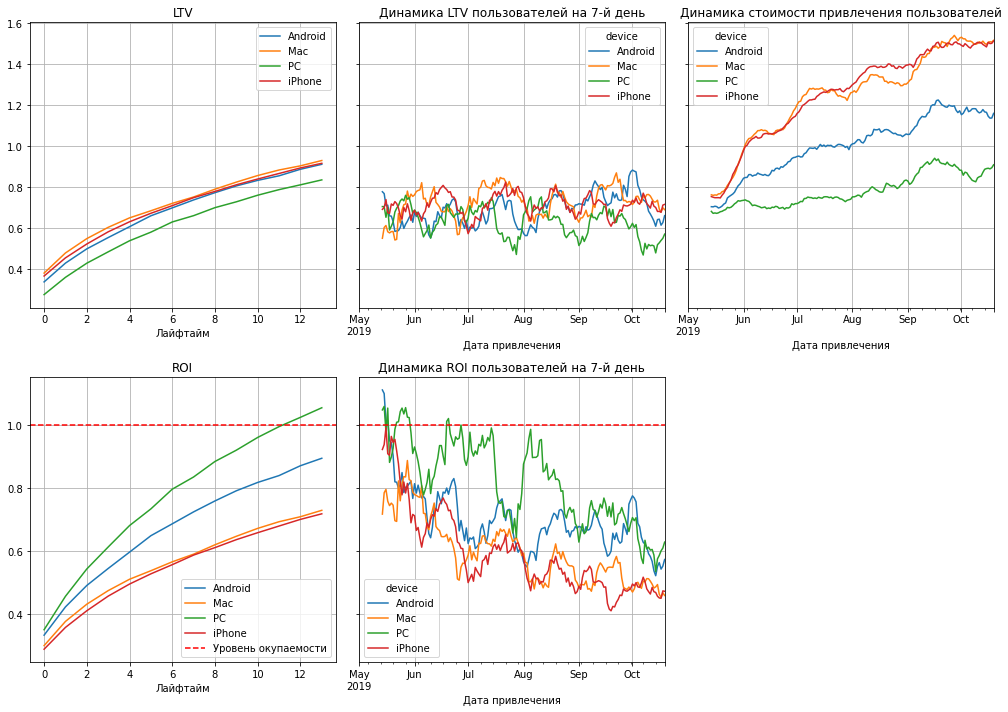

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На окупаемость вышли только пользователи PC, пользователи с мобильных устройств и MAC  не дотянули, и roi стабильно падает.  

### Oкупаемость рекламы с разбивкой по странам

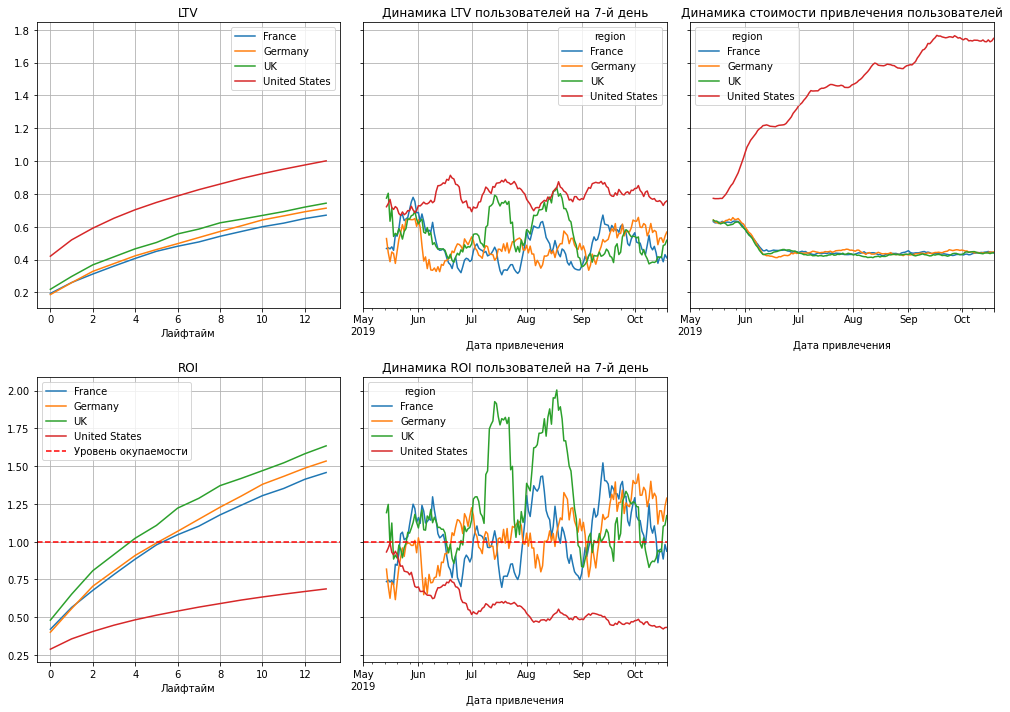

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения пользователей в США растет, но вместе с тем и не окупается. По Европе показатели окупаемости стоимости привлечения немного упали в июне, но динамика ROI положительная.  

Выоды:
В целом, реклама не окупается. Негативно на это влияют привлекамые из США клиенты с iPhone и MAC, черех TipTop и Faseboom. Хотя, у нас основная масса пользователей как раз и приходит из США. 
Можно порекомендовать маркетологам уменьшить вливания в каналы TipTop и FaseBoom. Посмотрим конверсию, для более точных рекомендаций. 

## Конверсия и удержание с разбивкой по устройствам, странам, рекламным каналам

In [46]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Конверсия и удержание с разбивкой по устройствам

Смотрим конверсию с разбивкой по устройствам

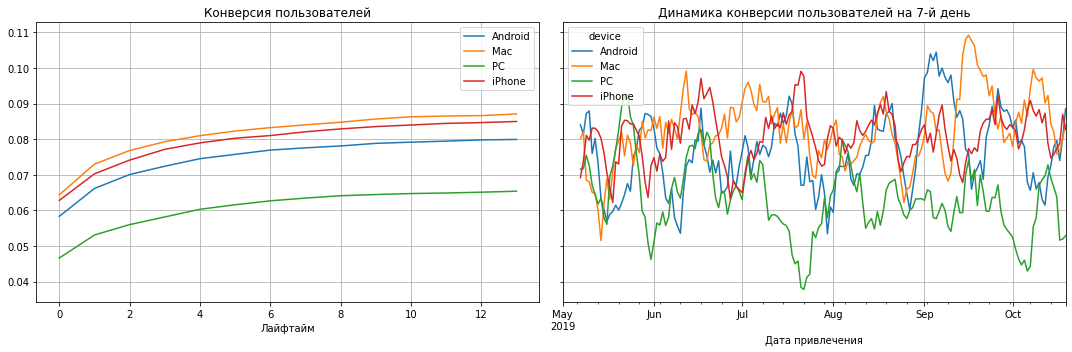

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, все пользователи конвертируются очень хорошо, причём постоянно.

Смотрим удержание с разбивкой по устройствам

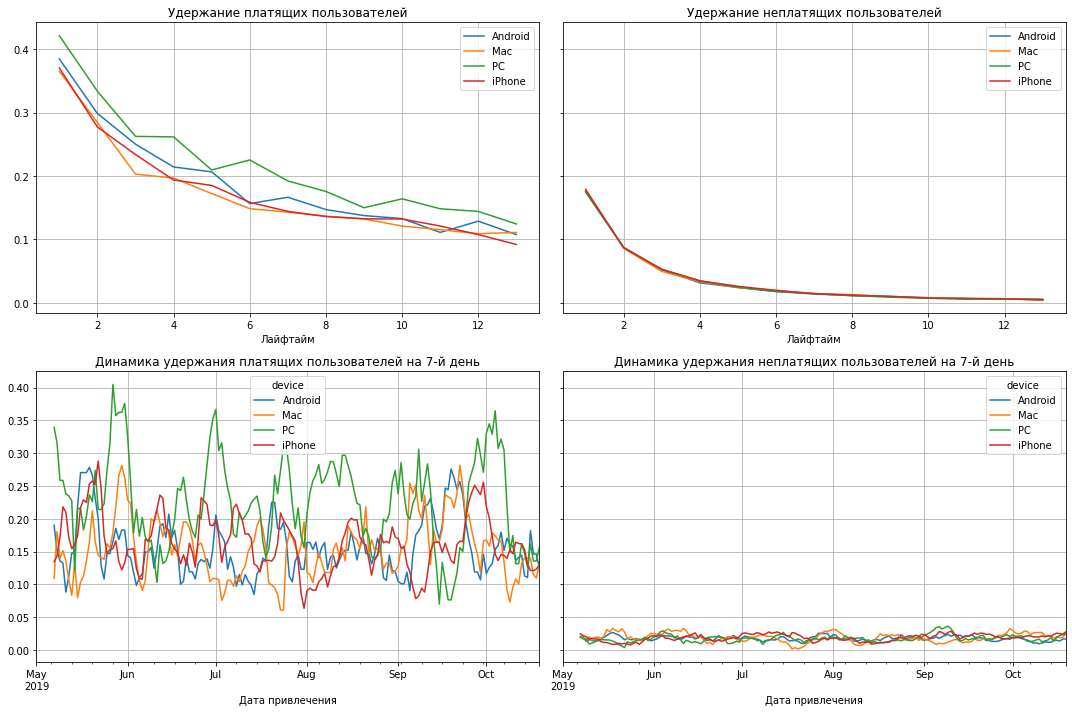

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Тут тоже все в норме. В приложение чаще заходят с РС, чем с мобильных устройств.

### Конверсия и удержание с разбивкой по странам

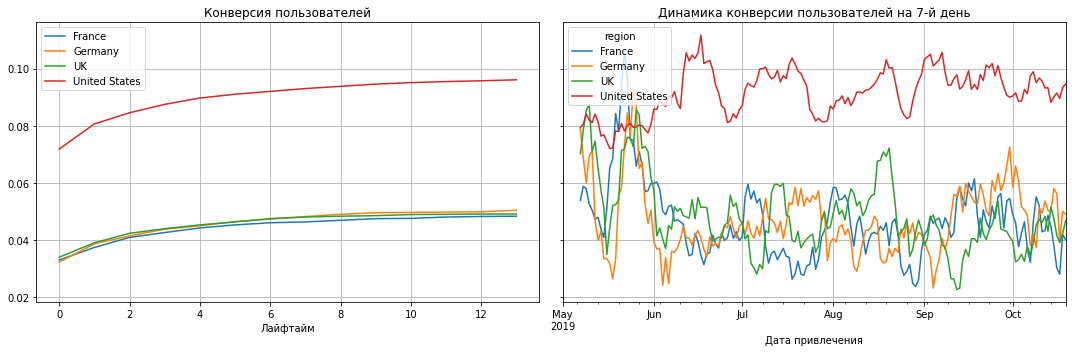

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

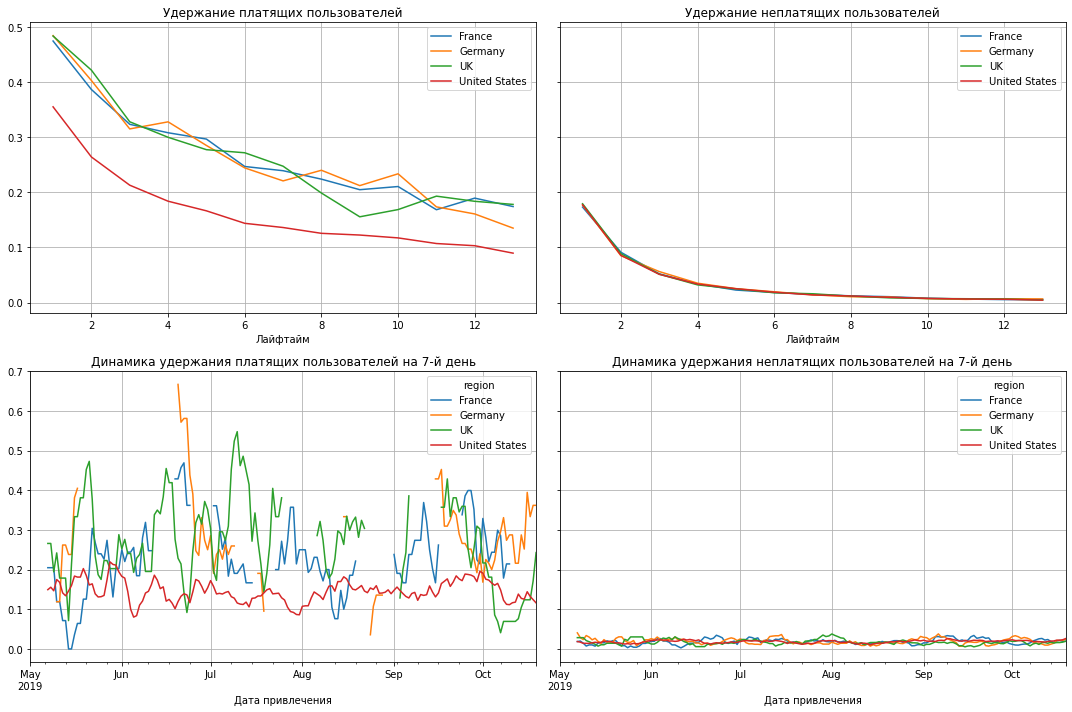

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Видно, что проблема опять с пользователями из США, у них удержание платящих пользователей хуже всех. Но конверсия лучше. 

### Конверсия и удержание с разбивкой по каналам

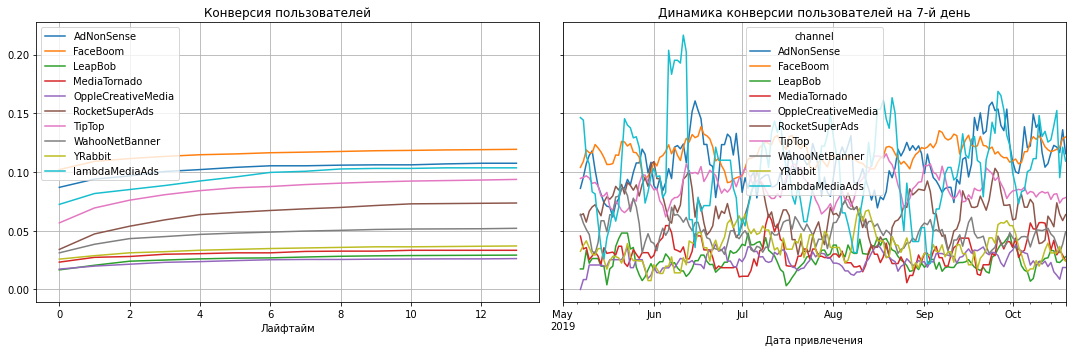

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions = ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

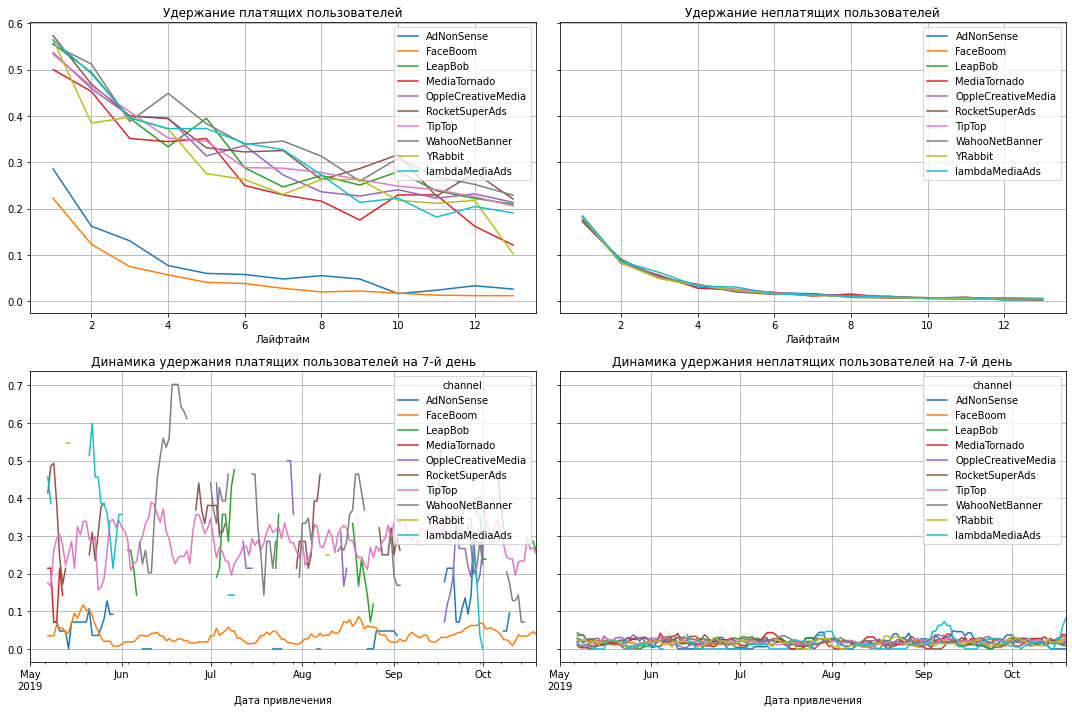

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия по каналам не плохая, а вот удержание платных пользователей хуже всего в каналах AdNonSense и в FaceBoom.

Вывод:

По проведенному анализу можно сделать вывод, что основным пользователем приложения являются жители США с iPhone и Maс, переходящие по бесплатной ссылке, из FaceBoom и AdNonSense. Однако, видно, что источники с высоким САС (TipTop,FaceBoom и AdNonSense) не окупаются.

Можно порекомендовать маркетологам уменьшить вливания в каналы TipTop,FaseBoom и AdNonSense, чтобы снизить стоимость привлечения пользователя и выйти на окупаемость рекламы, особенно в канале США. Стоит обратить внимание на более дешевые каналы привлечения пользователей, например WahooNetBanner	и YRabbit и попробовать развить рынок стран Европы, в частности Англии и Франции. 